In [ ]:
from scipy.fftpack import fft, ifft, rfft, irfft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0.03183098861837907 0.06366197723675814


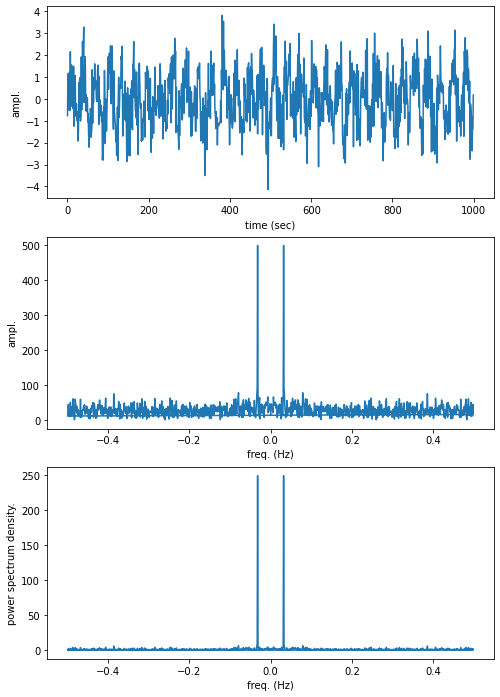

In [ ]:
Nx, dt = 1000, 1.

ampl1, omega1 = 1.0, 0.2*1.000
ampl2, omega2 = 0.0, 0.4
noise = 1.0

psdcut = 50

x = np.zeros(Nx)
x1 = np.zeros(Nx)     
x2 = np.zeros(Nx)     
xn = np.zeros(Nx)     
t = np.arange(0,Nx)

for ix in range(Nx):           # generate signal in time domain
  x1[ix] = ampl1*np.sin(omega1*ix)
  x2[ix] = ampl2*np.sin(omega2*ix)
xn = noise*np.random.randn(Nx) # generate noise in time domain
x = x1 + x2 + xn

fx = fft(x)                    # fx v faxis is signal in freq domain
faxis = fftfreq( x.size, dt) 
psd = fx*np.conj(fx) / Nx      # power spectral density versus freq.

fig,axes = plt.subplots(3,1,figsize = (8,12))

axes[0].plot(t,x)
axes[0].set_xlabel("time (sec)")
axes[0].set_ylabel("ampl.")

axes[1].plot(faxis,np.abs(fx))
axes[1].set_xlabel("freq. (Hz)")
axes[1].set_ylabel("ampl.")

axes[2].plot(faxis,psd)
axes[2].set_xlabel("freq. (Hz)")
axes[2].set_ylabel("power spectrum density.")

print( omega1/2./np.pi, omega2/2./np.pi)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'power spectrum density.')

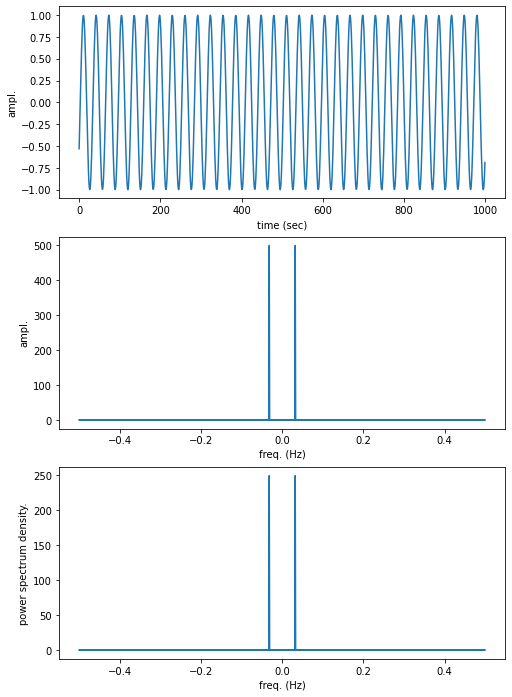

In [ ]:

cfx = np.copy(fx)
cfx[psd < psdcut] = 0              # apply filter in freq domain

cpsd = cfx*np.conj(cfx) / Nx   # power spectral density versus freq.
xp = ifft(cfx)                 # filter outpu

fig,axes = plt.subplots(3,1,figsize = (8,12))

axes[0].plot(t,xp)
axes[0].set_xlabel("time (sec)")
axes[0].set_ylabel("ampl.")

axes[1].plot(faxis,np.abs(cfx))
axes[1].set_xlabel("freq. (Hz)")
axes[1].set_ylabel("ampl.")

axes[2].plot(faxis,cpsd)
axes[2].set_xlabel("freq. (Hz)")
axes[2].set_ylabel("power spectrum density.")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


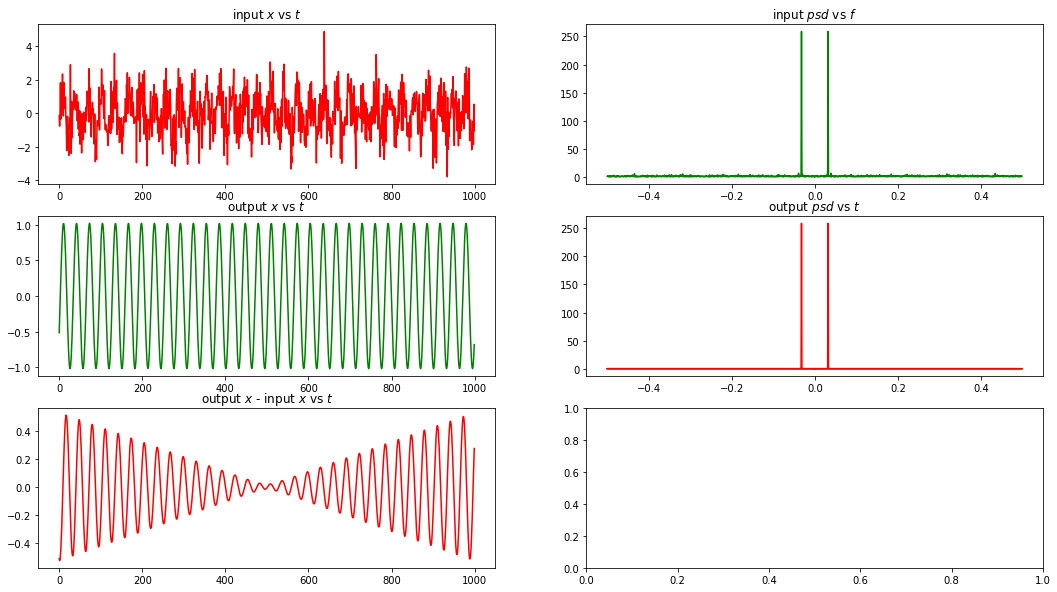

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3,ncols= 2,figsize = (18,10))

ax1.set_title('input $x$ vs $t$') 
ax2.set_title('input $psd$ vs $f$')
ax3.set_title('output $x$ vs $t$') 
ax4.set_title('output $psd$ vs $t$')
ax5.set_title('output $x$ - input $x$ vs $t$') 

ax1.plot(t,x,'r')
ax2.plot(faxis,psd,'g')
ax3.plot(t,xp,'g')
ax4.plot(faxis,cpsd,'r')
ax5.plot(t,xp-x1-x2,'r')
